# **CS412 HW3**

In [1]:
#importing needed libraries
import numpy as np
import pandas as pd
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Task 1**

Initilize the data.

In [2]:
#mounting google drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#saving all csv files as matrixes
titanicData = pd.read_csv('/content/drive/MyDrive/cs412/HW3/titanicdata.csv')
titanicData.sample(5)

,Survived,Pclass,Sex,Age
709,1,3,2,29.699118
439,0,2,2,31.000000
840,0,3,2,20.000000
720,1,2,1,6.000000
39,1,3,1,14.000000


Splitting data into training, validation and test.

In [4]:
train_data, temp_data = train_test_split(titanicData, test_size=0.4, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

Scailing features.

In [5]:
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data[['Age', 'Sex', 'Pclass']])
valid_data_scaled = scaler.transform(valid_data[['Age', 'Sex', 'Pclass']])
test_data_scaled = scaler.transform(test_data[['Age', 'Sex', 'Pclass']])

**Task 2**

In [6]:
X_train, y_train = train_data_scaled, train_data['Survived'].values
X_valid, y_valid = valid_data_scaled, valid_data['Survived'].values
X_test, y_test = test_data_scaled, test_data['Survived'].values

In [7]:
import matplotlib.pyplot as plt

#implement logistic regression
class LogisticRegression:
    #initialize regression
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros(num_features)
        self.train_losses = []
        self.val_losses = []
    #implement sigmoid function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    #Implement the cost function
    def cost_function(self, X, y):
        m = len(y)
        z = np.dot(X, self.weights)
        h = self.sigmoid(z)
        cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost
    #Implement the gradient descent algorithm
    def gradient_descent(self, X, y, learning_rate):
        m = len(y)
        z = np.dot(X, self.weights)
        h = self.sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        self.weights -= learning_rate * gradient


    #Train your model for Task 3
    def train(self, X_train, y_train, X_val, y_val, learning_rate, num_iterations):
        for i in range(num_iterations):
            self.gradient_descent(X_train, y_train, learning_rate)
            train_loss = self.cost_function(X_train, y_train)
            val_loss = self.cost_function(X_val, y_val)
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
    #Evaluate the model for Task 6
    def predict(self, X):
        z = np.dot(X, self.weights)
        predicted_probabilities = self.sigmoid(z)
        predictions = (predicted_probabilities >= 0.5).astype(int)
        return predictions


**Task 3**

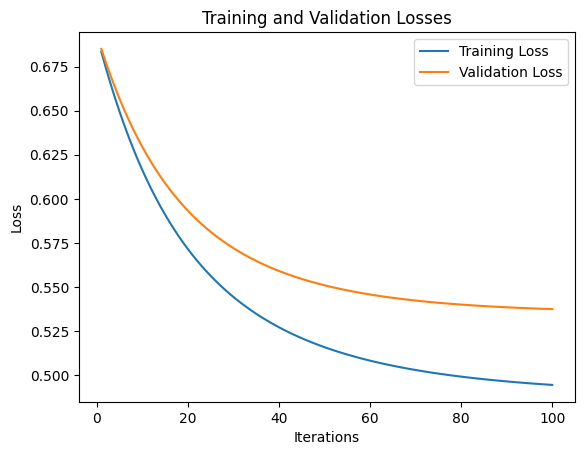

In [8]:
# Initialize the logistic regression model
model = LogisticRegression(num_features=X_train.shape[1])

# Set the learning rate and number of iterations
learning_rate = 0.1
num_iterations = 100

# Train the model
model.train(X_train, y_train, X_valid, y_valid, learning_rate, num_iterations)

# Plot the training and validation losses
plt.plot(range(1, num_iterations+1), model.train_losses, label='Training Loss')
plt.plot(range(1, num_iterations+1), model.val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

**Task 4**

Learning Rate: 0.01, Num Iterations: 50, Validation Loss: 0.6570929512862813
Learning Rate: 0.01, Num Iterations: 100, Validation Loss: 0.6300067495652006
Learning Rate: 0.01, Num Iterations: 150, Validation Loss: 0.6095333324539743
Learning Rate: 0.1, Num Iterations: 50, Validation Loss: 0.551028498355107
Learning Rate: 0.1, Num Iterations: 100, Validation Loss: 0.537520415648391
Learning Rate: 0.1, Num Iterations: 150, Validation Loss: 0.5355700417328977
Learning Rate: 0.5, Num Iterations: 50, Validation Loss: 0.5351107144405552
Learning Rate: 0.5, Num Iterations: 100, Validation Loss: 0.5347181480969195
Learning Rate: 0.5, Num Iterations: 150, Validation Loss: 0.5346437900628989
Best Hyperparameters: Learning Rate - 0.5, Num Iterations - 150, Validation Loss - 0.5346437900628989


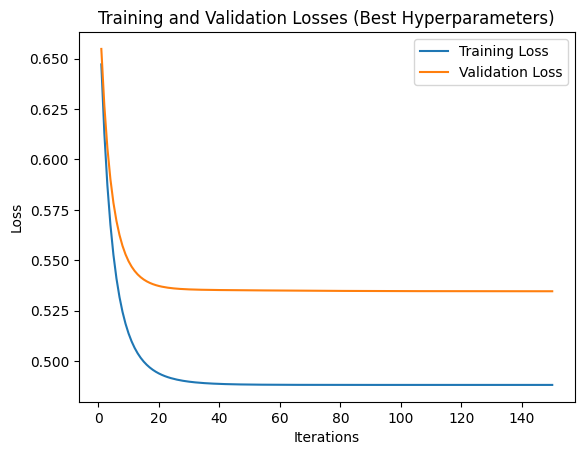

In [9]:
import matplotlib.pyplot as plt

# Function to train the model with different hyperparameters and return the validation losses
def train_with_hyperparameters(X_train, y_train, X_valid, y_valid, learning_rate, num_iterations):
    model = LogisticRegression(num_features=X_train.shape[1])
    model.train(X_train, y_train, X_valid, y_valid, learning_rate, num_iterations)
    val_loss = model.val_losses[-1]  # Get the final validation loss
    return val_loss

# Define the range of hyperparameters to try
learning_rates = [0.01, 0.1, 0.5]
num_iterations_list = [50, 100, 150]

best_loss = float('inf')
best_learning_rate = None
best_num_iterations = None

for lr in learning_rates:
    for num_iter in num_iterations_list:
        val_loss = train_with_hyperparameters(X_train, y_train, X_valid, y_valid, lr, num_iter)
        print(f'Learning Rate: {lr}, Num Iterations: {num_iter}, Validation Loss: {val_loss}')
        if val_loss < best_loss:
            best_loss = val_loss
            best_learning_rate = lr
            best_num_iterations = num_iter

print(f'Best Hyperparameters: Learning Rate - {best_learning_rate}, Num Iterations - {best_num_iterations}, Validation Loss - {best_loss}')

# Train the model with the best hyperparameters
model = LogisticRegression(num_features=X_train.shape[1])
model.train(X_train, y_train, X_valid, y_valid, best_learning_rate, best_num_iterations)

# Plot the loss curve for the best hyperparameters
plt.plot(range(1, best_num_iterations+1), model.train_losses, label='Training Loss')
plt.plot(range(1, best_num_iterations+1), model.val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Losses (Best Hyperparameters)')
plt.legend()
plt.show()


**Task 5**

In [10]:
import numpy as np

# Combine the training and validation data
X_train_combined = np.concatenate((X_train, X_valid), axis=0)
y_train_combined = np.concatenate((y_train, y_valid), axis=0)

# Train the final model with the chosen hyperparameters
final_model = LogisticRegression(num_features=X_train_combined.shape[1])
final_model.train(X_train=X_train_combined, y_train=y_train_combined,X_val=X_valid, y_val=y_valid, learning_rate=best_learning_rate, num_iterations=best_num_iterations)


**Task 6**

In [11]:
predictions = final_model.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on Testing Data: {accuracy}")

Accuracy on Testing Data: 0.8324022346368715
